# TTM4133- Mobility and Handovers in LTE
In this lab, we will explore the handover mechanism in LTE networks. We will be focusing on X2 based handover between different eNBs as the UE moves between their coverage areas. We will cover different user states at the RRC level to observe the status of the handover along with the monitoring of the RSRP, RSRQ, SINR as well as the Instantaneous Throughput to detect the impact on performance (if any). Several impacting parameters will be explored to understand the coverage behavior of cells in multi-cellular environments. <br>
Following is a short summary of the objectives for this lab:
- Understand the state flow and signaling associated with a handover
- Observe the coverage (RSRP, RSRQ, SINR) and traffic (Throughput) metrics during handovers 
- Impact of timing and thresholds during the handover process

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## 1. Introduction
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Handovers (HO) facilitate the mobility of users in radio access network (RAN) providing efficient switching, tear down and setup of user connections in the radio network. We will consider an Intra-MME X2-based HO for this lab, where **X2** interface between neighboring eNBs is utilized for the initiation and completion of HO process along with allocation and recovery of resources for current and target eNB. In this scenario, we have a multi-cellular environment with a mobile user located at point **A**, attached to **eNB1**, and, moving towards point **B** traversing through cells **eNB2** and **eNB3**. The approximate areas of interest for the HO are shown along the cell edges (dotted lines). HO is initiated as per selected algorithm in the ns3 script in these areas when specific criterion are met. The topology is shown in Fig. 1 along with an approximate SINR map with eNBs at the center of respective cells. <br>
!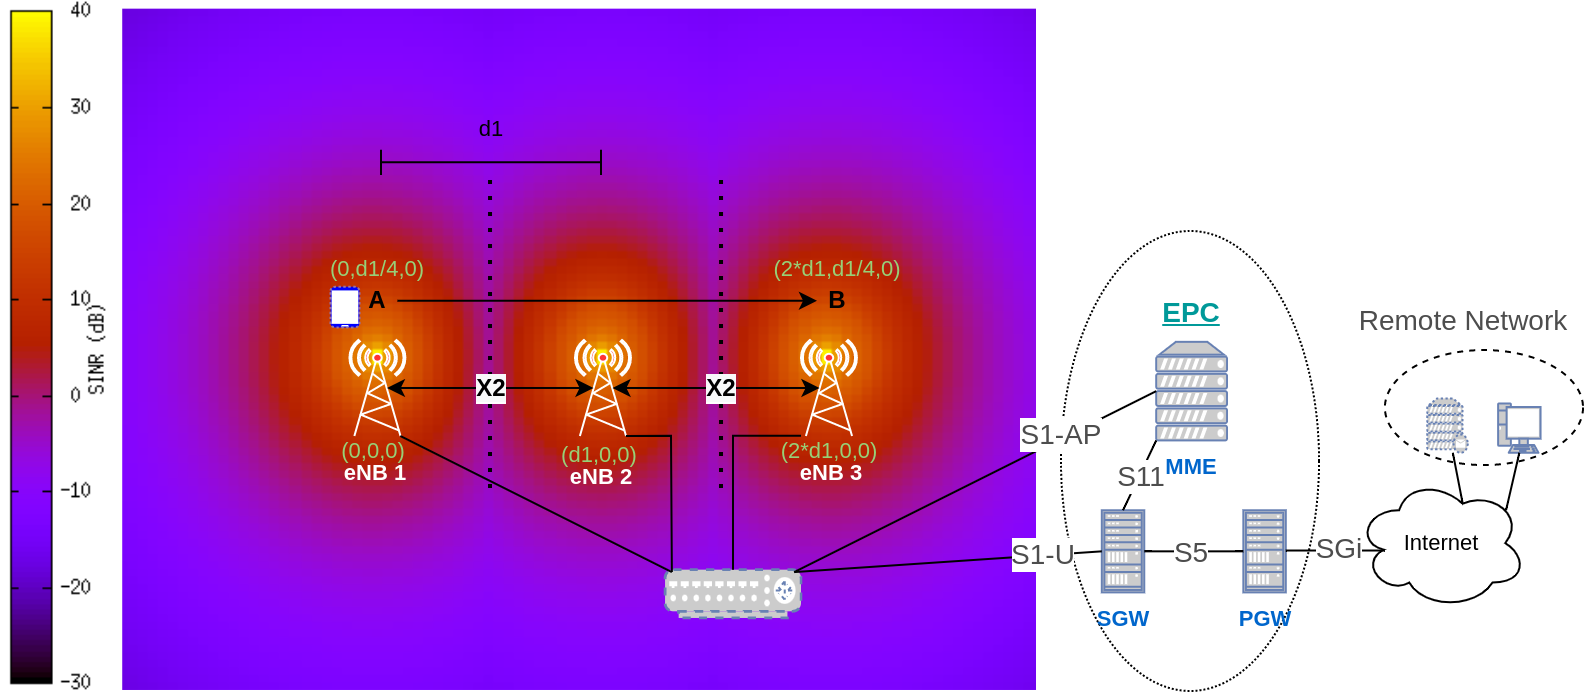
<center>
    <b>Figure. 1: Network Topology.</b>
</center>
The parameters effecting the behavior of the topology include the inter-eNB distance (**d1**), type of HO algorithm (**A2A4 or A3**), and associated thresholds. These parameters will be utilized to perform different simulations for the tasks in this lab. <br>
In A2A4RSRQ HO algorithm, two distinct events are observed namely <u>A2</u> and <u>A4</u> from the received UE status reports at eNB. <u>A2</u> happens when serving cell's signal quality (RSRQ) becomes worse than the predefined <u>ServingCellThreshold</u> and A4 happens when neighboring cell's signal quality (RSRQ) becomes better than the <u>ServingCellThreshold</u>. The HO is initiated once the difference between neighboring and serving cell's RSRQ equals <u>NeighborCellOffset</u>. The process is shown in Fig. 2.

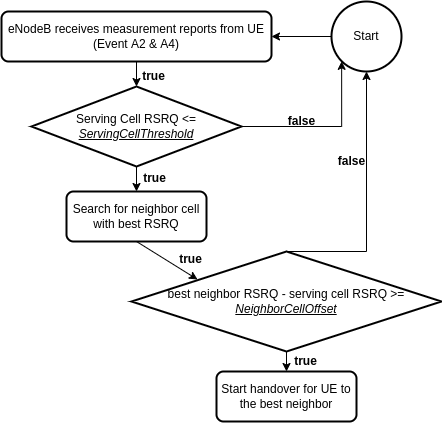
<center>
    <b>Figure. 2: A2A4 based handover.</b>
</center>

# Parameters
We will use the following parameters to help run different simulations in order to gather and visualize the generated results:
- <u>d1</u> --> To set Inter-site distance
- <u>enablersrp</u> -> To collect RSRP and RSRQ from the simulation
- <u>enablesinrue</u> -> To collect SINR from the simulation
- <u>enableInstTput</u> -> To collect instantaneous throughput from the simulation
- <u>a2a4Ho</u> --> To set A2A4 event-based HO algorithm
- <u>a2a4SCellThreshold</u> --> To set Serving Cell Threshold for A2A4 HO algorithm
- <u>a2a4neighborCellOffset</u> --> To Neighbor Cell Offset for A2A4 HO algorithm


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# 2. Running a Simulation and Performance Analysis
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Following steps will help us in precise interaction with the ns-3 script to alter different simulation parameters and obtain results upon completion. The results will be viewed in different cells in the notebook to visualize the performance of the simulation runs. The steps can be repeated with similar code snippets in order to answer different questions in the lab.

## 2.1 Running the initialization script
This script is responsible for the initialization of the simulation design using SEM and the specification of different parameters for the considered network topology implemented in ns-3. The expected outcome is the generation of databases with collected results to be visualized later. We pass the default values of <u>300</u> and <u>a2a4</u> for d1 and HO algorithm respectively as follows:<br>
**%run -i 'init.py' arg1 arg2 ...**

In [ ]:
%run -i 'init.py' 300 a2a4 30 1 #d1 HOAlgorithm a2a4SCellThreshold a2a4neighborCellOffset

## 2.2 Query and filter simulation results
The results from the sem simulation framework are queried and transferred to python for per-processing by defining a set of parameters and using the same simulation campaign that was utilized during the simulation process.

In [ ]:
params_rsrp = {
    'd1': 300,
    'enablersrp': True,
    'a2a4Ho': True,
    'a2a4SCellThreshold': 30,
    'a2a4neighborCellOffset': 1,
}
params_sinr = {
    'd1': 300,
    'enablesinrue': True,
    'a2a4Ho': True,
    'a2a4SCellThreshold': 30,
    'a2a4neighborCellOffset': 1,
}
params_tput = {
    'd1': 300,
    'enableInstTput': True,
    'a2a4Ho': True,
    'a2a4SCellThreshold': 30,
    'a2a4neighborCellOffset': 1,
}

res_rsrp = campaign.db.get_complete_results(params=params_rsrp)
res_sinr = campaign1.db.get_complete_results(params=params_sinr)
res_tput = campaign2.db.get_complete_results(params=params_tput)
# #####################################################################

## 2.3 Running the data pre-processing script
This script is responsible for the parsing of simulation data collected during the simulation runs. The expected outcome is the generation of python dataframe **res** for flow results and output for UE and eNB states during the connection setup and attachment phase.

In [ ]:
%run -i 'data-pre.py'

## 2.4 Sample Simulation Results

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(40,20))
snsp1 = sns.lineplot(ax=axes[0,0], data=res, x='time', y='rsrp', hue='eNBi', ci=None)
snsp1.xaxis.set_major_locator(ticker.LinearLocator(12))
snsp1.set( xlabel='Simulation Time (s)', ylabel='Reference Signal Received Power (RSRP) (dBm)')
snsp1.set(xlim=(0, None))

snsp2 = sns.lineplot(ax=axes[0,1], data=res, x='time', y='rsrq', hue='eNBi', ci=None)
snsp2.xaxis.set_major_locator(ticker.LinearLocator(12))
snsp2.set( xlabel='Simulation Time (s)', ylabel='Reference Signal Received Quality (RSRQ) (dB)')
snsp2.set(xlim=(0, None))

snsp3 =  sns.lineplot(ax=axes[1,0],data=res1, x='time', y='snr', hue='eNBi', ci=None)
snsp3.xaxis.set_major_locator(ticker.LinearLocator(12))
snsp3.set( xlabel='Simulation Time (s)', ylabel='Signal-to-Interference-Noise Ratio (SINR) (dB)')
snsp3.set(xlim=(0, None))

snsp4 =  sns.lineplot(ax=axes[1,1],data=res2, x='time', y='tput', hue='eNBi', ci=None)
snsp4.xaxis.set_major_locator(ticker.LinearLocator(40))
snsp4.set( xlabel='Simulation Time (s)', ylabel='Instantaneous Throughput (Mbps)')
# snsp4.legend(labels=["d1: 500", "d1: 1000", "d1: 2000"], title = "User Distribution")
snsp4.set(xlim=(0, None))


## Q1. It is observable that the throughput of the UE is uniform as it traverses across different cells. Explain the reason behind this.

## Q2. Mention the exact moments of time where the handover is triggered as the UE moves between points A and B? (Hint: Check for the reported throughput from different eNBs)

## Q3. Fluctuations in throughput are observed during the handovers. What could be the possible reason for this behavior?

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Task#1: Impact of Inter-cell distance on the handover and throughput performance
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
The relative position of the user in the coverage area of the cells dictates the levels of received RSRP and SINR providing a specific RSRQ. A mobile user will experience variation in these parameters during its path triggering handovers (when criterion is met). In this task, the positioning of the users is to be altered to observe the performance difference in terms of different stages of the HO. The transmit power of the eNB and UE is kept constant throughout the process to identify the sensitivity to the coverage area. <br>
The students are expected to run the simulation using the following sets of parameters and answer the relevant queries afterwards:


## Scenario 1 (Parameters: d1 = 500, Algorithm = a2a4, a2a4SCellThreshold = 30, a2a4neighborCellOffset = 1)

## Scenario 2 (Parameters: d1 = 1000, Algorithm = a2a4, a2a4SCellThreshold = 30, a2a4neighborCellOffset = 1)

## Scenario 3 (Parameters: d1 = 1500, Algorithm = a2a4, a2a4SCellThreshold = 30, a2a4neighborCellOffset = 1)

## Q1. What is the impact of increasing d1 on the flow (throughput) performance between the UE and the remote server?

## Q2. What is the relation between d1 and the fluctuations in throughput during the handover process? Explain? 

## Q3. From the given scenarios, what is the most suitable placement of users (d1) in the given topology to reduce the disruption in service during handovers? Why? (Hint: check the throughput plot and impact of d1)

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Task#2: Fine Tuning Handovers
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Handovers can become an issue if the process is not tuned properly as per the network environment and parameters. Here, we consider the A2A4 Algorithm for the HO with two distinct thresholds defined as follows: <br>
- <u>Serving Cell Threshold</u> (**a2a4SCellThreshold**) <br>
Used to trigger the handover if the serving cell RSRQ falls below this value 
- <u>Neighbor Cell Offset</u> (**a2a4neighborCellOffset**) <br>
Used to signify the difference between the prospective neighbor cell RSRQ and the serving cell RSRQ.

These parameters help decide firstly the time to trigger the HO and then the resulting cell for the UE after the HO is completed. In this task, we will study the impact of these parameters for the topology shown in Fig. 1. The students are expected to run the simulation using the following sets of parameters and answer the relevant queries afterwards:

## Scenario 1 
(**Parameters: d1 = 1000, Algorithm = a2a4, a2a4SCellThreshold = 15, a2a4neighborCellOffset = 0**)

## Scenario 2 
(**Parameters: d1 = 1000, Algorithm = a2a4, a2a4SCellThreshold = 30, a2a4neighborCellOffset = 0**)

## Q1. Considering scenarios 1 and 2, what is the impact of increasing the serving cell threshold on the start of HO and throughput performance? Which scenario provides the better performance and low disruption of traffic during HO?

## Scenario 3
(**Parameters: d1 = 1000, Algorithm = a2a4, a2a4SCellThreshold = 15, a2a4neighborCellOffset = 5**)

## Scenario 4
(**Parameters: d1 = 1000, Algorithm = a2a4, a2a4SCellThreshold = 30, a2a4neighborCellOffset = 5**)

## Q2. Comparing scenarios 2 and 4, what is the impact of increased Neighbor Offset on the HO and throughput performance? How long is the disruption in both scenario sets with NeighborOffsets of 0 and 5?

## Q3. Considering the mechanics of the HO process, how can we reduce the impact on throughput of UE traffic? Moreover, how can the transition time during HO be reduced?

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------